# **Hierarchical Clustring**

In [4]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
df=pd.read_csv("/content/crime_data.csv")
df.head()


Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [6]:
print(df.shape) #Dimention of data is

(50, 5)


In [7]:
df.info()    #There is no null values present in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [10]:
df.boxplot()    #As we can see there is one point in rape column which shows outlier...

In [11]:
data=df.iloc[:,1:]


In [12]:
#before processing going for standared scalar
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
data_norm=norm.fit_transform(data)

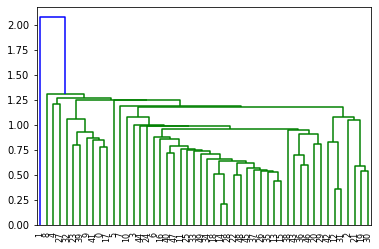

In [13]:
#Creating Dendrogram
Dendrogram=sch.dendrogram(sch.linkage(data_norm,method="single"))

In [14]:
Dendrogram=sch.dendrogram(sch.linkage(data_norm,method="average"))

In [15]:
Dendrogram=sch.dendrogram(sch.linkage(data_norm,method="complete"))

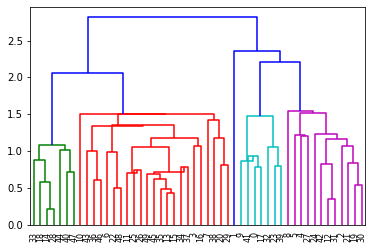

In [16]:

Dendrogram=sch.dendrogram(sch.linkage(data_norm,method="centroid"))

As we see in centroid and average we are getting one outlier and single linkage is not making good cluster so I will go with complete linkage.

Average-linkage and complete-linkage are the two most popular distance metrics in hierarchical clustering.

In [17]:
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")
y_hc=hc.fit_predict(data_norm)
y_hc


array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [18]:
df["Cluster_hirachy"]=y_hc
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape  Cluster
0          Alabama    13.2      236        58  21.2        0
1           Alaska    10.0      263        48  44.5        0
2          Arizona     8.1      294        80  31.0        2
3         Arkansas     8.8      190        50  19.5        1
4       California     9.0      276        91  40.6        2
5         Colorado     7.9      204        78  38.7        2
6      Connecticut     3.3      110        77  11.1        1
7         Delaware     5.9      238        72  15.8        1
8          Florida    15.4      335        80  31.9        2
9          Georgia    17.4      211        60  25.8        0
10          Hawaii     5.3       46        83  20.2        1
11           Idaho     2.6      120        54  14.2        3
12        Illinois    10.4      249        83  24.0        2
13         Indiana     7.2      113        65  21.0        1
14            Iowa     2.2       56        57  11.3        3
15          Kansas     6.0      115        66  18.0        1
16        Kentucky     9.7      109        52  16.3        1
17       Louisiana    15.4      249        66  22.2        0
18           Maine     2.1       83        51   7.8        3
19        Maryland    11.3      300        67  27.8        2
20   Massachusetts     4.4      149        85  16.3        1
21        Michigan    12.1      255        74  35.1        2
22       Minnesota     2.7       72        66  14.9        1
23     Mississippi    16.1      259        44  17.1        0
24        Missouri     9.0      178        70  28.2        1
25         Montana     6.0      109        53  16.4        3
26        Nebraska     4.3      102        62  16.5        3
27          Nevada    12.2      252        81  46.0        2
28   New Hampshire     2.1       57        56   9.5        3
29      New Jersey     7.4      159        89  18.8        1
30      New Mexico    11.4      285        70  32.1        2
31        New York    11.1      254        86  26.1        2
32  North Carolina    13.0      337        45  16.1        0
33    North Dakota     0.8       45        44   7.3        3
34            Ohio     7.3      120        75  21.4        1
35        Oklahoma     6.6      151        68  20.0        1
36          Oregon     4.9      159        67  29.3        1
37    Pennsylvania     6.3      106        72  14.9        1
38    Rhode Island     3.4      174        87   8.3        1
39  South Carolina    14.4      279        48  22.5        0
40    South Dakota     3.8       86        45  12.8        3
41       Tennessee    13.2      188        59  26.9        0
42           Texas    12.7      201        80  25.5        2
43            Utah     3.2      120        80  22.9        1
44         Vermont     2.2       48        32  11.2        3
45        Virginia     8.5      156        63  20.7        1
46      Washington     4.0      145        73  26.2        1
47   West Virginia     5.7       81        39   9.3        3
48       Wisconsin     2.6       53        66  10.8        1
49         Wyoming     6.8      161        60  15.6        1

In [19]:
df[df["Cluster"]==0].mean()   #As we can see 0th cluster contain above avg rape rate,high assultrate and murder rate and below avg urban popoulation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder       14.0875
Assault     252.7500
UrbanPop     53.5000
Rape         24.5375
Cluster       0.0000
dtype: float64

In [20]:
df[df["Cluster"]==1].mean() # 1th cluster have below avg murder rate,assault rate and rape rate with above avg urban population

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder        5.871429
Assault     134.476190
UrbanPop     70.761905
Rape         18.580952
Cluster       1.000000
dtype: float64

In [21]:
df[df["Cluster"]==2].mean() # 2nd cluster have high murder rate,assault rate and rape rate with high urban population

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder       11.054545
Assault     264.090909
UrbanPop     79.090909
Rape         32.618182
Cluster       2.000000
dtype: float64

In [22]:
df[df["Cluster"]==3].mean() #3rd and final cluster contain low murder rate,assult rate, rape rate with low urban population

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder       3.18
Assault     78.70
UrbanPop    49.30
Rape        11.63
Cluster      3.00
dtype: float64

# **K-MEANS**

In [23]:
from sklearn.cluster import KMeans

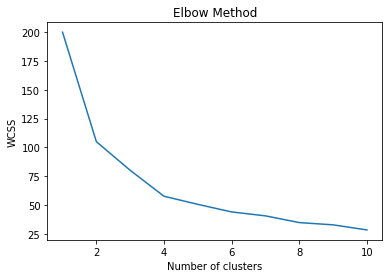

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#using best k values for cluster
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [26]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [27]:
df["cluster_k_means"]=clusters_new.labels_

In [28]:
df

Unnamed: 0  Murder  Assault  UrbanPop  Rape  Cluster  cluster_k_means
0          Alabama    13.2      236        58  21.2        0                1
1           Alaska    10.0      263        48  44.5        0                2
2          Arizona     8.1      294        80  31.0        2                2
3         Arkansas     8.8      190        50  19.5        1                1
4       California     9.0      276        91  40.6        2                2
5         Colorado     7.9      204        78  38.7        2                2
6      Connecticut     3.3      110        77  11.1        1                0
7         Delaware     5.9      238        72  15.8        1                0
8          Florida    15.4      335        80  31.9        2                2
9          Georgia    17.4      211        60  25.8        0                1
10          Hawaii     5.3       46        83  20.2        1                0
11           Idaho     2.6      120        54  14.2        3                3
12        Illinois    10.4      249        83  24.0        2                2
13         Indiana     7.2      113        65  21.0        1                0
14            Iowa     2.2       56        57  11.3        3                3
15          Kansas     6.0      115        66  18.0        1                0
16        Kentucky     9.7      109        52  16.3        1                3
17       Louisiana    15.4      249        66  22.2        0                1
18           Maine     2.1       83        51   7.8        3                3
19        Maryland    11.3      300        67  27.8        2                2
20   Massachusetts     4.4      149        85  16.3        1                0
21        Michigan    12.1      255        74  35.1        2                2
22       Minnesota     2.7       72        66  14.9        1                3
23     Mississippi    16.1      259        44  17.1        0                1
24        Missouri     9.0      178        70  28.2        1                2
25         Montana     6.0      109        53  16.4        3                3
26        Nebraska     4.3      102        62  16.5        3                3
27          Nevada    12.2      252        81  46.0        2                2
28   New Hampshire     2.1       57        56   9.5        3                3
29      New Jersey     7.4      159        89  18.8        1                0
30      New Mexico    11.4      285        70  32.1        2                2
31        New York    11.1      254        86  26.1        2                2
32  North Carolina    13.0      337        45  16.1        0                1
33    North Dakota     0.8       45        44   7.3        3                3
34            Ohio     7.3      120        75  21.4        1                0
35        Oklahoma     6.6      151        68  20.0        1                0
36          Oregon     4.9      159        67  29.3        1                0
37    Pennsylvania     6.3      106        72  14.9        1                0
38    Rhode Island     3.4      174        87   8.3        1                0
39  South Carolina    14.4      279        48  22.5        0                1
40    South Dakota     3.8       86        45  12.8        3                3
41       Tennessee    13.2      188        59  26.9        0                1
42           Texas    12.7      201        80  25.5        2                2
43            Utah     3.2      120        80  22.9        1                0
44         Vermont     2.2       48        32  11.2        3                3
45        Virginia     8.5      156        63  20.7        1                0
46      Washington     4.0      145        73  26.2        1                0
47   West Virginia     5.7       81        39   9.3        3                3
48       Wisconsin     2.6       53        66  10.8        1                3
49         Wyoming     6.8      161        60  15.6        1                0

# **DBSCAN**

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps=
                2, min_samples=7)
dbscan.fit(data_norm)

DBSCAN(eps=2, min_samples=7)

In [34]:
#Noisy samples are given the label -1.
m=dbscan.labels_
m

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [32]:
df["cluster_DBSCAN"]=dbscan.labels_

In [33]:
df

Unnamed: 0  Murder  Assault  ...  Cluster  cluster_k_means  cluster_DBSCAN
0          Alabama    13.2      236  ...        0                1               0
1           Alaska    10.0      263  ...        0                2              -1
2          Arizona     8.1      294  ...        2                2               0
3         Arkansas     8.8      190  ...        1                1               0
4       California     9.0      276  ...        2                2               0
5         Colorado     7.9      204  ...        2                2               0
6      Connecticut     3.3      110  ...        1                0               0
7         Delaware     5.9      238  ...        1                0               0
8          Florida    15.4      335  ...        2                2               0
9          Georgia    17.4      211  ...        0                1               0
10          Hawaii     5.3       46  ...        1                0               0
11           Idaho     2.6      120  ...        3                3               0
12        Illinois    10.4      249  ...        2                2               0
13         Indiana     7.2      113  ...        1                0               0
14            Iowa     2.2       56  ...        3                3               0
15          Kansas     6.0      115  ...        1                0               0
16        Kentucky     9.7      109  ...        1                3               0
17       Louisiana    15.4      249  ...        0                1               0
18           Maine     2.1       83  ...        3                3               0
19        Maryland    11.3      300  ...        2                2               0
20   Massachusetts     4.4      149  ...        1                0               0
21        Michigan    12.1      255  ...        2                2               0
22       Minnesota     2.7       72  ...        1                3               0
23     Mississippi    16.1      259  ...        0                1               0
24        Missouri     9.0      178  ...        1                2               0
25         Montana     6.0      109  ...        3                3               0
26        Nebraska     4.3      102  ...        3                3               0
27          Nevada    12.2      252  ...        2                2               0
28   New Hampshire     2.1       57  ...        3                3               0
29      New Jersey     7.4      159  ...        1                0               0
30      New Mexico    11.4      285  ...        2                2               0
31        New York    11.1      254  ...        2                2               0
32  North Carolina    13.0      337  ...        0                1               0
33    North Dakota     0.8       45  ...        3                3               0
34            Ohio     7.3      120  ...        1                0               0
35        Oklahoma     6.6      151  ...        1                0               0
36          Oregon     4.9      159  ...        1                0               0
37    Pennsylvania     6.3      106  ...        1                0               0
38    Rhode Island     3.4      174  ...        1                0               0
39  South Carolina    14.4      279  ...        0                1               0
40    South Dakota     3.8       86  ...        3                3               0
41       Tennessee    13.2      188  ...        0                1               0
42           Texas    12.7      201  ...        2                2               0
43            Utah     3.2      120  ...        1                0               0
44         Vermont     2.2       48  ...        3                3               0
45        Virginia     8.5      156  ...        1                0               0
46      Washington     4.0      145  ...        1                0               0
47   West Virginia     5